In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
import math
import itertools
from pprint import pprint

In [2]:
df = pd.read_csv("DataSet1_1.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  100 non-null    object 
 1   N       100 non-null    int64  
 2   X1      100 non-null    float64
 3   X2      100 non-null    float64
 4   X3      100 non-null    float64
 5   X4      100 non-null    float64
 6   X5      100 non-null    float64
 7   X6      100 non-null    float64
 8   X7      100 non-null    float64
 9   X8      100 non-null    float64
 10  X9      100 non-null    float64
 11  X10     100 non-null    float64
 12  X11     100 non-null    float64
 13  X12     100 non-null    float64
 14  X13     100 non-null    float64
 15  X14     100 non-null    float64
 16  X15     100 non-null    float64
 17  X16     100 non-null    float64
 18  X17     100 non-null    float64
 19  X18     100 non-null    float64
 20  X19     100 non-null    float64
 21  X20     100 non-null    float64
dtypes: 

In [3]:
df

,Region,N,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Белгородская область,1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,...,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
1,Брянская область,2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,...,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
2,Владимирская область,3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,...,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
3,Воронежская область,4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,...,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
4,Ивановская область,5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,...,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Регион 96,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Регион 97,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Регион 98,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Регион 99,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df["Region"].unique()

array(['Белгородская область', 'Брянская область ',
       'Владимирская область', 'Воронежская область',
       'Ивановская область', 'Калужская область', 'Костромская область',
       'Курская область', 'Липецкая область', 'Московская область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область ', 'Тверская область', 'Тульская область',
       'Ярославская область', 'г. Москва', 'Республика Карелия',
       'Республика Коми', 'Ненецкий АО', 'Архангельская область без АО',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым',
       'Краснодарский Край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика'

In [5]:
df.loc[85:]

,Region,N,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
85,Регион 86,86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,Регион 87,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,Регион 88,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,Регион 89,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,Регион 90,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,Регион 91,91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,Регион 92,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Регион 93,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Регион 94,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Регион 95,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df.loc[:84]
df

,Region,N,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Белгородская область,1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,...,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
1,Брянская область,2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,...,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
2,Владимирская область,3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,...,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
3,Воронежская область,4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,...,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
4,Ивановская область,5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,...,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,81,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,...,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
81,Магаданская область,82,74.9,77.7,87.7,43.5,33.8,1.6,48.3,17.6,...,15.2,12.8,46.3,20.0,5.8,92.5,61.2,22.7,21.0,57.4
82,Сахалинская область,83,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,...,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8
83,Еврейская автономная область,84,54.7,55.3,67.4,39.9,24.9,1.2,52.2,17.7,...,14.6,14.4,59.5,15.2,4.2,86.5,28.8,1.7,15.0,67.6


In [7]:
region = df["Region"]
region

0             Белгородская область
1                Брянская область 
2             Владимирская область
3              Воронежская область
4               Ивановская область
                  ...             
80                Амурская область
81             Магаданская область
82             Сахалинская область
83    Еврейская автономная область
84                    Чукотский АО
Name: Region, Length: 85, dtype: object

In [8]:
df = df.drop(columns=["Region", "N"])
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,15.5,58.8,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
1,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,10.6,42.7,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
2,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,14.2,58.1,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
3,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,15.4,54.8,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
4,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,10.3,53.9,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,8.0,38.0,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
81,74.9,77.7,87.7,43.5,33.8,1.6,48.3,17.6,9.4,43.9,15.2,12.8,46.3,20.0,5.8,92.5,61.2,22.7,21.0,57.4
82,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,10.2,50.7,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8
83,54.7,55.3,67.4,39.9,24.9,1.2,52.2,17.7,9.9,42.2,14.6,14.4,59.5,15.2,4.2,86.5,28.8,1.7,15.0,67.6


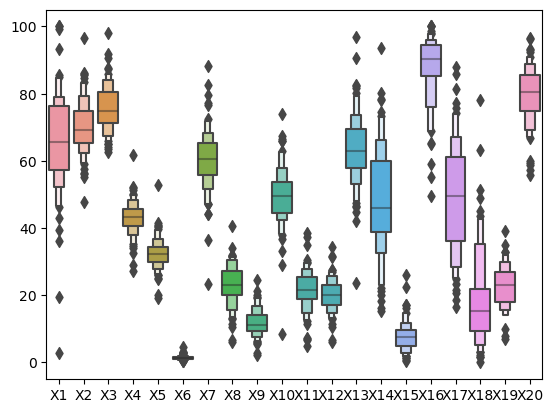

In [9]:
sns.boxenplot(data=df)
plt.show()

In [10]:
df = df / 100

In [11]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,0.610,0.667,0.715,0.379,0.316,0.009,0.634,0.318,0.155,0.588,0.290,0.264,0.670,0.395,0.108,0.960,0.643,0.632,0.32,0.895
1,0.511,0.672,0.694,0.400,0.300,0.019,0.600,0.200,0.106,0.427,0.186,0.191,0.573,0.564,0.077,0.927,0.573,0.066,0.20,0.872
2,0.660,0.668,0.721,0.418,0.300,0.020,0.690,0.265,0.142,0.581,0.272,0.238,0.727,0.365,0.104,0.924,0.505,0.230,0.25,0.811
3,0.429,0.766,0.790,0.437,0.349,0.019,0.622,0.256,0.154,0.548,0.258,0.231,0.604,0.596,0.053,0.841,0.404,0.146,0.18,0.885
4,0.700,0.636,0.703,0.442,0.334,0.014,0.608,0.224,0.103,0.539,0.253,0.215,0.678,0.491,0.045,0.956,0.445,0.106,0.14,0.831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.782,0.654,0.763,0.384,0.279,0.008,0.483,0.187,0.080,0.380,0.145,0.153,0.544,0.343,0.112,0.901,0.480,0.052,0.23,0.689
81,0.749,0.777,0.877,0.435,0.338,0.016,0.483,0.176,0.094,0.439,0.152,0.128,0.463,0.200,0.058,0.925,0.612,0.227,0.21,0.574
82,0.542,0.711,0.746,0.458,0.368,0.011,0.596,0.215,0.102,0.507,0.193,0.187,0.611,0.408,0.139,0.959,0.676,0.268,0.30,0.868
83,0.547,0.553,0.674,0.399,0.249,0.012,0.522,0.177,0.099,0.422,0.146,0.144,0.595,0.152,0.042,0.865,0.288,0.017,0.15,0.676


In [12]:
df["mul"] = 1

In [13]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,mul
0,0.610,0.667,0.715,0.379,0.316,0.009,0.634,0.318,0.155,0.588,...,0.264,0.670,0.395,0.108,0.960,0.643,0.632,0.32,0.895,1
1,0.511,0.672,0.694,0.400,0.300,0.019,0.600,0.200,0.106,0.427,...,0.191,0.573,0.564,0.077,0.927,0.573,0.066,0.20,0.872,1
2,0.660,0.668,0.721,0.418,0.300,0.020,0.690,0.265,0.142,0.581,...,0.238,0.727,0.365,0.104,0.924,0.505,0.230,0.25,0.811,1
3,0.429,0.766,0.790,0.437,0.349,0.019,0.622,0.256,0.154,0.548,...,0.231,0.604,0.596,0.053,0.841,0.404,0.146,0.18,0.885,1
4,0.700,0.636,0.703,0.442,0.334,0.014,0.608,0.224,0.103,0.539,...,0.215,0.678,0.491,0.045,0.956,0.445,0.106,0.14,0.831,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.782,0.654,0.763,0.384,0.279,0.008,0.483,0.187,0.080,0.380,...,0.153,0.544,0.343,0.112,0.901,0.480,0.052,0.23,0.689,1
81,0.749,0.777,0.877,0.435,0.338,0.016,0.483,0.176,0.094,0.439,...,0.128,0.463,0.200,0.058,0.925,0.612,0.227,0.21,0.574,1
82,0.542,0.711,0.746,0.458,0.368,0.011,0.596,0.215,0.102,0.507,...,0.187,0.611,0.408,0.139,0.959,0.676,0.268,0.30,0.868,1
83,0.547,0.553,0.674,0.399,0.249,0.012,0.522,0.177,0.099,0.422,...,0.144,0.595,0.152,0.042,0.865,0.288,0.017,0.15,0.676,1


In [20]:
for col in df.columns[~df.columns.isin(["mul"])]:
    df["mul"] *= df[col]

In [21]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,mul
0,0.610,0.667,0.715,0.379,0.316,0.009,0.634,0.318,0.155,0.588,...,0.264,0.670,0.395,0.108,0.960,0.643,0.632,0.32,0.895,1.408724e-09
1,0.511,0.672,0.694,0.400,0.300,0.019,0.600,0.200,0.106,0.427,...,0.191,0.573,0.564,0.077,0.927,0.573,0.066,0.20,0.872,1.595126e-11
2,0.660,0.668,0.721,0.418,0.300,0.020,0.690,0.265,0.142,0.581,...,0.238,0.727,0.365,0.104,0.924,0.505,0.230,0.25,0.811,4.675210e-10
3,0.429,0.766,0.790,0.437,0.349,0.019,0.622,0.256,0.154,0.548,...,0.231,0.604,0.596,0.053,0.841,0.404,0.146,0.18,0.885,9.083265e-11
4,0.700,0.636,0.703,0.442,0.334,0.014,0.608,0.224,0.103,0.539,...,0.215,0.678,0.491,0.045,0.956,0.445,0.106,0.14,0.831,2.090838e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.782,0.654,0.763,0.384,0.279,0.008,0.483,0.187,0.080,0.380,...,0.153,0.544,0.343,0.112,0.901,0.480,0.052,0.23,0.689,1.517343e-12
81,0.749,0.777,0.877,0.435,0.338,0.016,0.483,0.176,0.094,0.439,...,0.128,0.463,0.200,0.058,0.925,0.612,0.227,0.21,0.574,6.817471e-12
82,0.542,0.711,0.746,0.458,0.368,0.011,0.596,0.215,0.102,0.507,...,0.187,0.611,0.408,0.139,0.959,0.676,0.268,0.30,0.868,1.998309e-10
83,0.547,0.553,0.674,0.399,0.249,0.012,0.522,0.177,0.099,0.422,...,0.144,0.595,0.152,0.042,0.865,0.288,0.017,0.15,0.676,3.217643e-14


In [22]:
df = df.sort_values(by="mul", ascending=False)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,mul
28,0.195,0.860,0.860,0.522,0.415,0.030,0.796,0.342,0.195,0.675,...,0.317,0.824,0.409,0.147,0.966,0.758,0.294,0.26,0.908,9.971761e-09
61,0.782,0.965,0.981,0.347,0.278,0.013,0.594,0.227,0.175,0.489,...,0.192,0.644,0.936,0.225,0.888,0.673,0.780,0.31,0.830,6.657955e-09
9,0.536,0.817,0.823,0.368,0.291,0.020,0.681,0.407,0.246,0.630,...,0.343,0.801,0.801,0.088,0.925,0.633,0.172,0.24,0.764,4.553299e-09
17,0.029,0.855,0.848,0.617,0.528,0.030,0.826,0.315,0.213,0.660,...,0.314,0.907,0.735,0.121,0.981,0.721,0.252,0.35,0.852,3.541641e-09
60,0.658,0.861,0.917,0.352,0.288,0.007,0.679,0.278,0.193,0.514,...,0.242,0.773,0.697,0.163,0.973,0.742,0.491,0.30,0.871,3.492630e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.547,0.553,0.674,0.399,0.249,0.012,0.522,0.177,0.099,0.422,...,0.144,0.595,0.152,0.042,0.865,0.288,0.017,0.15,0.676,3.217643e-14
30,0.713,0.639,0.738,0.485,0.325,0.008,0.472,0.155,0.077,0.368,...,0.105,0.466,0.451,0.006,0.551,0.165,0.198,0.16,0.767,2.956589e-14
42,1.000,0.617,0.859,0.342,0.260,0.005,0.482,0.067,0.028,0.588,...,0.066,0.510,0.598,0.012,0.924,0.672,0.030,0.20,0.929,7.436491e-15
37,0.993,0.478,0.636,0.272,0.201,0.005,0.472,0.061,0.022,0.291,...,0.062,0.688,0.425,0.005,0.495,0.187,0.077,0.07,0.589,2.025894e-17


In [23]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,mul
28,0.195,0.860,0.860,0.522,0.415,0.030,0.796,0.342,0.195,0.675,...,0.317,0.824,0.409,0.147,0.966,0.758,0.294,0.26,0.908,9.971761e-09
61,0.782,0.965,0.981,0.347,0.278,0.013,0.594,0.227,0.175,0.489,...,0.192,0.644,0.936,0.225,0.888,0.673,0.780,0.31,0.830,6.657955e-09
9,0.536,0.817,0.823,0.368,0.291,0.020,0.681,0.407,0.246,0.630,...,0.343,0.801,0.801,0.088,0.925,0.633,0.172,0.24,0.764,4.553299e-09
17,0.029,0.855,0.848,0.617,0.528,0.030,0.826,0.315,0.213,0.660,...,0.314,0.907,0.735,0.121,0.981,0.721,0.252,0.35,0.852,3.541641e-09
60,0.658,0.861,0.917,0.352,0.288,0.007,0.679,0.278,0.193,0.514,...,0.242,0.773,0.697,0.163,0.973,0.742,0.491,0.30,0.871,3.492630e-09
16,0.582,0.643,0.659,0.463,0.335,0.025,0.686,0.287,0.151,0.577,...,0.258,0.729,0.461,0.144,0.944,0.575,0.381,0.27,0.830,2.847623e-09
62,0.363,0.749,0.765,0.474,0.389,0.012,0.624,0.303,0.200,0.500,...,0.257,0.644,0.601,0.171,0.855,0.591,0.435,0.23,0.909,1.904445e-09
0,0.610,0.667,0.715,0.379,0.316,0.009,0.634,0.318,0.155,0.588,...,0.264,0.670,0.395,0.108,0.960,0.643,0.632,0.32,0.895,1.408724e-09
73,0.503,0.700,0.763,0.512,0.404,0.029,0.608,0.276,0.133,0.491,...,0.233,0.672,0.591,0.091,0.864,0.432,0.311,0.33,0.745,1.031274e-09
49,0.788,0.590,0.626,0.500,0.397,0.016,0.648,0.288,0.113,0.666,...,0.229,0.640,0.498,0.079,0.987,0.815,0.185,0.30,0.963,8.882357e-10


In [24]:
df.tail(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,mul
80,0.782,0.654,0.763,0.384,0.279,0.008,0.483,0.187,0.080,0.380,...,0.153,0.544,0.343,0.112,0.901,0.480,0.052,0.23,0.689,1.517343e-12
66,0.933,0.575,0.874,0.450,0.365,0.012,0.365,0.116,0.054,0.383,...,0.131,0.421,0.702,0.083,0.651,0.217,0.150,0.19,0.765,5.927046e-13
69,0.711,0.775,0.651,0.416,0.289,0.006,0.513,0.192,0.079,0.402,...,0.167,0.501,0.270,0.041,0.910,0.412,0.095,0.18,0.723,4.934346e-13
39,0.590,0.613,0.783,0.388,0.191,0.011,0.557,0.150,0.058,0.444,...,0.132,0.683,0.328,0.107,0.652,0.341,0.023,0.08,0.594,4.735541e-14
41,0.394,0.723,0.847,0.373,0.266,0.011,0.559,0.160,0.083,0.497,...,0.152,0.576,0.324,0.034,0.691,0.277,0.016,0.10,0.818,4.600918e-14
83,0.547,0.553,0.674,0.399,0.249,0.012,0.522,0.177,0.099,0.422,...,0.144,0.595,0.152,0.042,0.865,0.288,0.017,0.15,0.676,3.217643e-14
30,0.713,0.639,0.738,0.485,0.325,0.008,0.472,0.155,0.077,0.368,...,0.105,0.466,0.451,0.006,0.551,0.165,0.198,0.16,0.767,2.956589e-14
42,1.000,0.617,0.859,0.342,0.260,0.005,0.482,0.067,0.028,0.588,...,0.066,0.510,0.598,0.012,0.924,0.672,0.030,0.20,0.929,7.436491e-15
37,0.993,0.478,0.636,0.272,0.201,0.005,0.472,0.061,0.022,0.291,...,0.062,0.688,0.425,0.005,0.495,0.187,0.077,0.07,0.589,2.025894e-17
40,0.772,0.633,0.780,0.402,0.321,0.004,0.542,0.157,0.072,0.484,...,0.154,0.568,0.436,0.018,0.842,0.382,0.000,0.15,0.809,0.000000e+00


In [26]:
region[df.head(10).index]

28          г. Санкт-Петербург
61           Ямало-Ненецкий АО
9           Московская область
17                   г. Москва
60         Ханты-Мансийский АО
16         Ярославская область
62    Тюменская область без АО
0         Белгородская область
73       Новосибирская область
49        Чувашская Республика
Name: Region, dtype: object

In [27]:
region[df.tail(10).index]

80                   Амурская область
66                    Республика Тыва
69                  Забайкалький Край
39    Кабардино-Балкарская Республика
41         Республика Северная Осетия
83       Еврейская автономная область
30                Республика Калмыкия
42               Чеченская Республика
37                Республика Дагестан
40    Карачаево-Черкесская Республика
Name: Region, dtype: object